In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


# Step 1: Importing Files and Analyse

## Importing 1st CSV files(Trends in Visitor Arrivals to Japan)

In [2]:
# The code was removed by Watson Studio for sharing.

,Year,Growth Rate(%),Term,Visitor Arrivals
0,1964,na,Jan. - Dec.,352832
1,1965,3.916028025,Jan. - Dec.,366649
2,1966,18.07941655,Jan. - Dec.,432937
3,1967,10.12479876,Jan. - Dec.,476771
4,1968,8.858131052,Jan. - Dec.,519004


In [19]:
df_data_2.dtypes

Year                 int64
Growth Rate(%)      object
Term                object
Visitor Arrivals     int64
dtype: object

In [9]:
df_data_1.columns = list(map(str, df_data_1.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in df_data_1.columns)

True

### Plotting graph to visualize the trending data over years

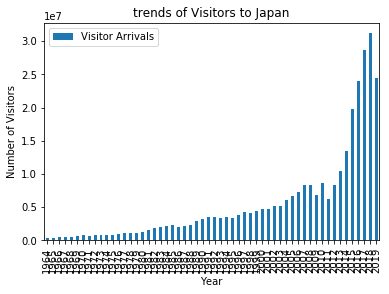

In [25]:
df_data_2.plot.bar(x= 'Year', y= 'Visitor Arrivals')

plt.title('trends of Visitors to Japan')
plt.ylabel('Number of Visitors')
plt.xlabel('Year')

plt.show()

In [26]:
plt.rcParams['figure.figsize']= [10,6]

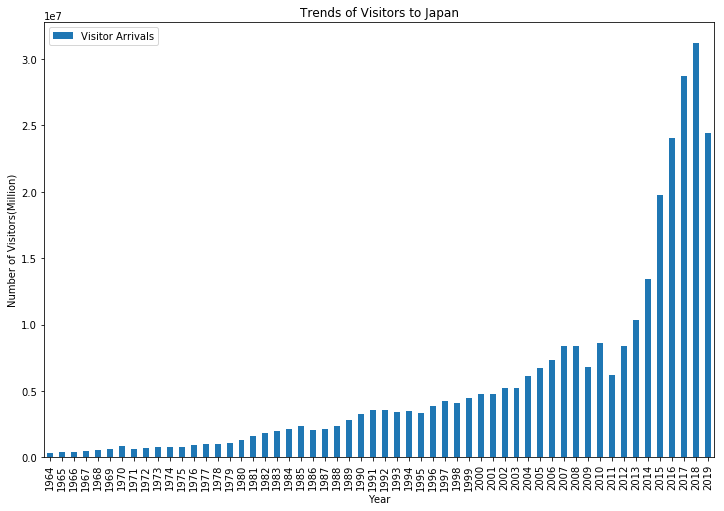

In [30]:
df_data_2.plot.bar(x= 'Year', y= 'Visitor Arrivals')
plt.rcParams['figure.figsize']= [12,8]
plt.title('Trends of Visitors to Japan')
plt.ylabel('Number of Visitors(Million)')
plt.xlabel('Year')

plt.show()

## Importing 2nd CSV Files(Trend Visitors to Japan by Country)

In [31]:

body = client_105aad3b4f9a402083dd276e73efa6b4.get_object(Bucket='capstoneprojectbattleofneighborho-donotdelete-pr-dfrivsgnr84xsg',Key='Trend visitors by country to Japan.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()


,Country/Area,Purpose_of_visit_to_Japan,Year,Growth Rate(%),Visitor Arrivals
0,China,Tourism,1990,NaN,NaN
1,China,Tourism,1991,NaN,NaN
2,China,Tourism,1992,NaN,29147.0
3,China,Tourism,1993,-9.239372834,26454.0
4,China,Tourism,1994,-7.197399259,24550.0


In [33]:

body = client_105aad3b4f9a402083dd276e73efa6b4.get_object(Bucket='capstoneprojectbattleofneighborho-donotdelete-pr-dfrivsgnr84xsg',Key='Trend visitors by country to Japan.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()


,Country/Area,Purpose_of_visit_to_Japan,Year,Growth Rate(%),Visitor Arrivals
0,China,Tourism,1990,NaN,211986
1,China,Tourism,1991,NaN,260974
2,China,Tourism,1992,NaN,337293
3,China,Tourism,1993,-9.239373,387032
4,China,Tourism,1994,-7.197399,362422


In [47]:

body = client_105aad3b4f9a402083dd276e73efa6b4.get_object(Bucket='capstoneprojectbattleofneighborho-donotdelete-pr-dfrivsgnr84xsg',Key='Trend visitors by country to Japan.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()


,Year,China,Taiwan,United Kingdom,United States,South Korea,Hong Kong
0,1990,211986,607721,101927,554753,740441,152563
1,1991,260974,658106,102859,543075,861820,155092
2,1992,337293,715487,104395,560940,864052,177672
3,1993,387032,668581,107488,533401,845423,152452
4,1994,362422,647408,119861,531352,918459,145249


In [48]:
df_data_0.tail()

,Year,China,Taiwan,United Kingdom,United States,South Korea,Hong Kong
24,2014,3064744,2829821,220060,891668,2755313,925975
25,2015,5749458,3677075,258488,1033258,4002095,1524292
26,2016,7212003,4167512,292458,1242719,5090302,1839193
27,2017,8263896,4564053,310499,1374964,7140438,2231568
28,2018,9333895,4757258,333979,1526407,7538952,2207804


### Plotting the data to visualize Top 6 Countries Trend to Visit Japan

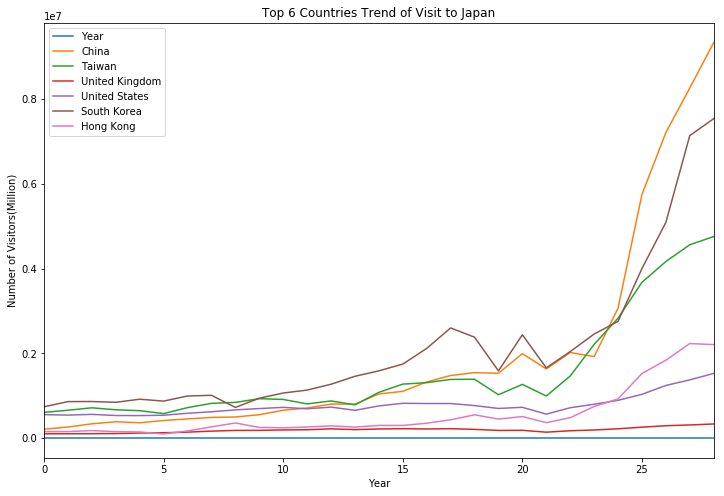

In [11]:
df_data_0.plot.line()
plt.rcParams['figure.figsize']= [20,10]
plt.title('Top 6 Countries Trend of Visit to Japan')
plt.ylabel('Number of Visitors(Million)')
plt.xlabel('Year')

plt.show()

In [10]:
df_data_0.dtypes

Year              int64
China             int64
Taiwan            int64
United Kingdom    int64
United States     int64
South Korea       int64
Hong Kong         int64
dtype: object

In [12]:
#set year as index
df_data_0.set_index('Year', inplace=True)
df_data_0.tail(3)

,China,Taiwan,United Kingdom,United States,South Korea,Hong Kong
Year,,,,,,
2016,7212003,4167512,292458,1242719,5090302,1839193
2017,8263896,4564053,310499,1374964,7140438,2231568
2018,9333895,4757258,333979,1526407,7538952,2207804


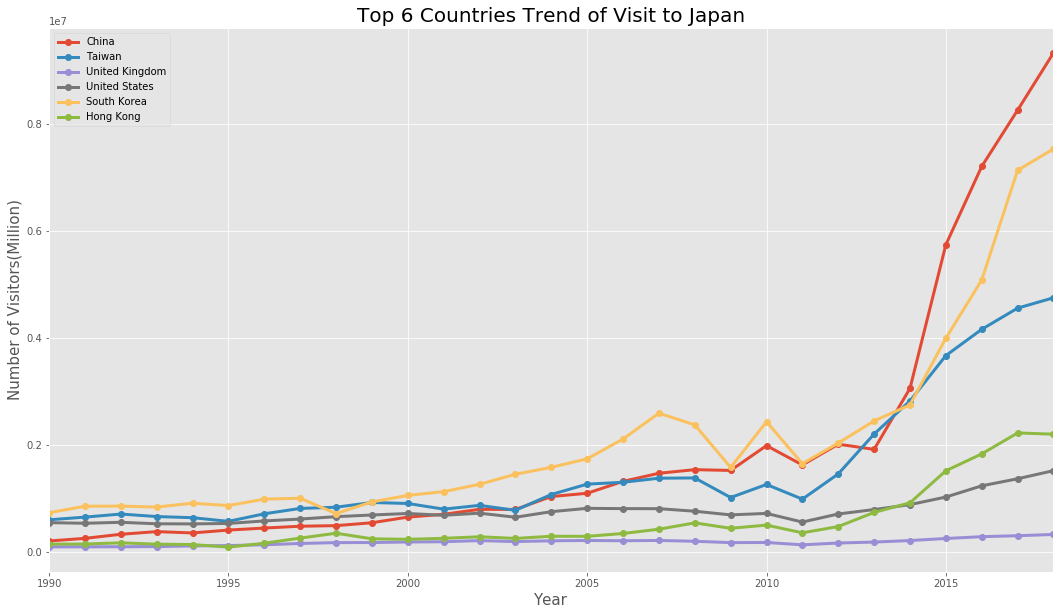

In [38]:
mpl.style.use(['ggplot'])

df_data_0.plot(kind='line',figsize= [18,10], linewidth= 3.0, marker = 'o')

plt.title('Top 6 Countries Trend of Visit to Japan', fontsize= 20)
plt.ylabel('Number of Visitors(Million)', fontsize= 15)
plt.xlabel('Year', fontsize = 15)


plt.show()

## Importing 3rd CSV files '2019 Travel Breakdown by Area'

In [40]:

body = client_105aad3b4f9a402083dd276e73efa6b4.get_object(Bucket='capstoneprojectbattleofneighborho-donotdelete-pr-dfrivsgnr84xsg',Key='2019 breakdown by Country and area.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_2 = pd.read_csv(body)
df_data_2


,Area,Visitor Arrivals
0,East Asia,17734309
1,Europe & Americas & Australia,3022116
2,Others,1002980
3,Southeast Asia & India,2658374


### Plotting chart to visualize trending of visitors in Area

In [41]:
#set area as index
df_data_2.set_index('Area', inplace=True)

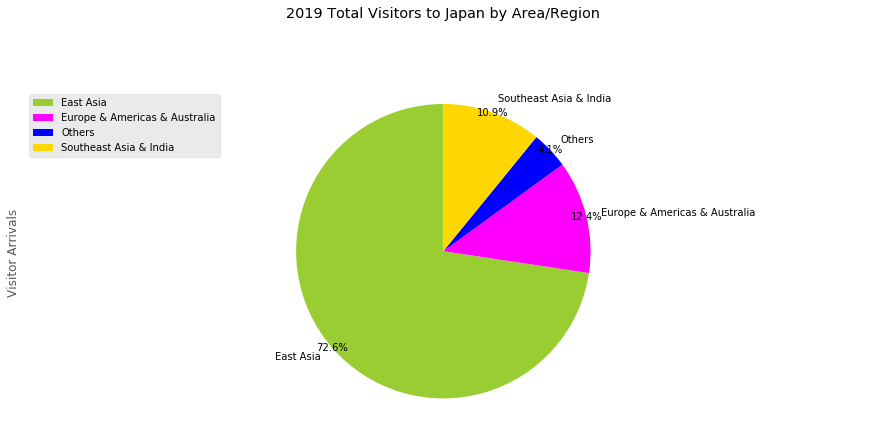

In [57]:
#set pie chart color
colors_list = ['yellowgreen', 'magenta', 'blue', 'gold', 'lightcoral']

# autopct create %, start angle represent starting point
df_data_2['Visitor Arrivals'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90
                            shadow=False,       # remove shadow   
                            pctdistance=1.0,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list
                            )

# scale the title up by 10% to match pctdistance
plt.title('2019 Total Visitors to Japan by Area/Region', y=1.2) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_data_2.index, loc='upper left') 

plt.show()

#### Southeast Asia&India are mostly an islamic country or have high Muslim populations [Malaysia, Indonesia, Singapore, India]
####  'Others' refers to middle east and africas where majority of the countries are Muslims. 
#### We can see the trends and percentage of estimation of Muslim travellers to Japan via the pie chart.

## Importing 4th CSV file "Travel Spending per Catagory in 'Southeast Asia & India' Area"

In [93]:

body = client_105aad3b4f9a402083dd276e73efa6b4.get_object(Bucket='capstoneprojectbattleofneighborho-donotdelete-pr-dfrivsgnr84xsg',Key='Travel Spend Countries.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_4 = pd.read_csv(body)
df_data_4.head()


,Category,India,Malaysia,Indonesia,Singapore
0,Accommodation,69506,42533,42593,63084
1,Food and drink,31212,28261,23084,33308
2,Transportation,21875,21106,22188,19005
3,Entertainment service,3268,4508,5098,4414
4,Shopping,31583,39303,36431,44350


### Plotting graph to visualize the Travel Spend by Country in Southeast Asia & India

In [94]:
#set category as index
df_data_4.set_index('Category', inplace=True)

df_data_4.head()

,India,Malaysia,Indonesia,Singapore
Category,,,,
Accommodation,69506,42533,42593,63084
Food and drink,31212,28261,23084,33308
Transportation,21875,21106,22188,19005
Entertainment service,3268,4508,5098,4414
Shopping,31583,39303,36431,44350


In [103]:
country= list(map(str,('India','Malaysia','Indonesia','Singapore')))

country

['India', 'Malaysia', 'Indonesia', 'Singapore']

In [107]:
df_data_4

Category,Accommodation,Food and drink,Transportation,Entertainment service,Shopping,Others
India,69506,31212,21875,3268,31583,0
Malaysia,42533,28261,21106,4508,39303,40
Indonesia,42593,23084,22188,5098,36431,1
Singapore,63084,33308,19005,4414,44350,120


### Plotting Graph to Visualize the Spending Figures for category according to Country

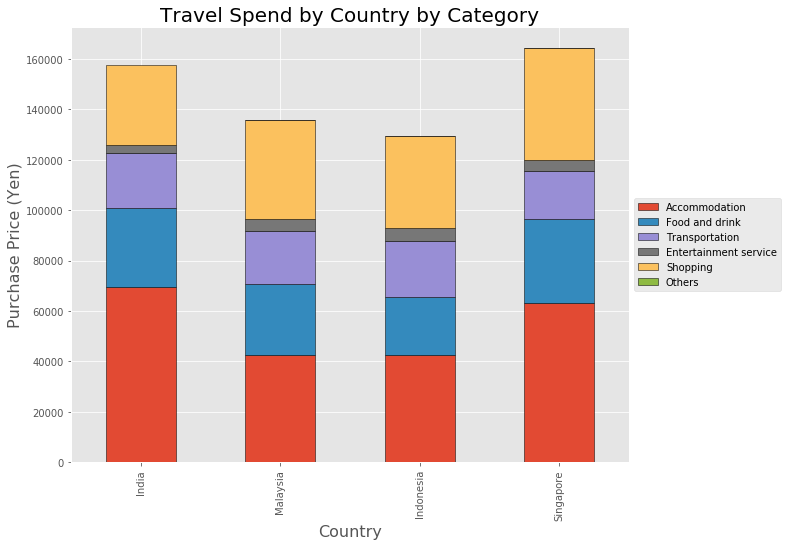

In [129]:
df_data_4.plot(kind= 'bar', stacked= True, figsize=(10,8),edgecolor='k')

plt.title('Travel Spend by Country by Category',fontsize= 20)
plt.ylabel('Purchase Price (Yen)', fontsize=16)
plt.xlabel('Country', fontsize=16)

# add legend
plt.legend(labels=df_data_4, loc='upper right')

# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

## Importing 5th CSV File on 'Visitors to Japan by Prefecture'

In [3]:
!conda install html5lib --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - html5lib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.1.1   |                0         132 KB

The following packages will be UPDATED:

    ca-certificates: 2019.11.27-0 --> 2020.1.1-0


ca-certificates-2020 | 132 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [28]:

body = client_105aad3b4f9a402083dd276e73efa6b4.get_object(Bucket='capstoneprojectbattleofneighborho-donotdelete-pr-dfrivsgnr84xsg',Key='Ranking by prefecture.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()


,Prefecture,Visit Rate(%)
0,Tokyo,46.204569
1,Osaka,38.730277
2,Chiba Prefecture,36.002669
3,Kyoto,25.853417
4,Fukuoka Prefecture,9.750087


In [42]:
df_data_0.columns = list(map(str, df_data_0.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in df_data_0.columns)

True

In [30]:
df_data_0.head()

,Prefecture,Visit Rate(%)
0,Tokyo,46.204569
1,Osaka,38.730277
2,Chiba Prefecture,36.002669
3,Kyoto,25.853417
4,Fukuoka Prefecture,9.750087


In [43]:
df_data_0.dtypes

Prefecture                   object
Visit Rate in Percentage    float64
dtype: object

In [39]:
df_data_0.rename(columns={'Visit Rate(%)':'Visit Rate in Percentage'}, inplace=True)

In [55]:
df_data_0.head(2)

,Visit Rate in Percentage
Prefecture,
Tokyo,46.204569
Osaka,38.730277


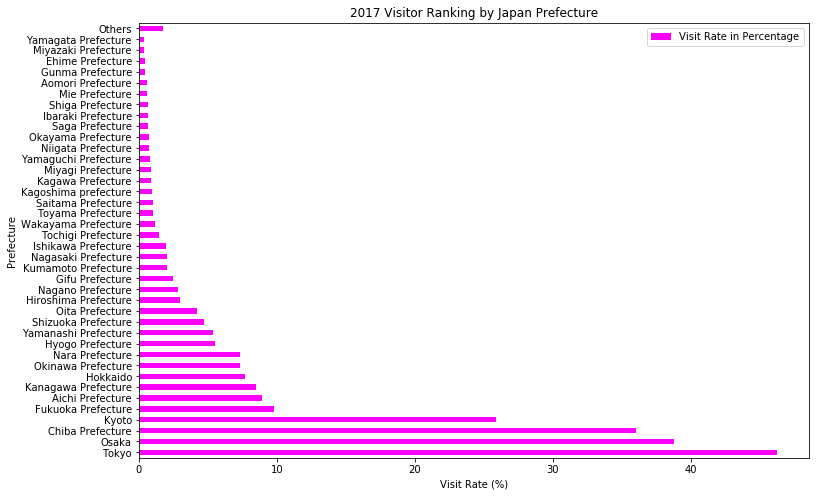

In [52]:
df_data_0.plot(kind= 'barh', figsize= (12,8), color= 'magenta', width= 0.5)

plt.title('2017 Visitor Ranking by Japan Prefecture')
plt.xlabel('Visit Rate (%)')

plt.show()

 ### In 2017, the most visited prefecture in Japan is Tokyo. Hence we will narrow down the scope to Tokyo area.
 ### Tokyo has 46.2% of all international visitors to Japan

# Step 2: Getting Location information on Tokyo

In [4]:
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [61]:

!conda install html5lib --yes


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - html5lib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         156 KB

The following packages will be UPDATED:

    certifi:         2019.11.28-py36_0     conda-forge --> 2019.11.28-py36_0
    openssl:         1.1.1d-h516909a_0     conda-forge --> 1.1.1d-h7b6447c_3

The following packages will be DOWNGRADED:

    ca-certificates: 2019.11.28-hecc5488_0 conda-forge --> 2019.11.27-0     


certifi-2019.11.28   | 156 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


### Importing List of Postal codes in Tokyo

In [5]:
import requests
from bs4 import BeautifulSoup

In [69]:
source = requests.get('http://tabotabo.my.coocan.jp/pzips/tokyo.htm').text

In [70]:
soup = BeautifulSoup(source, 'html5lib')

In [112]:
postal_codes_dict = {} # initialize an empty dictionary to save the data in
for table_cell in soup.find_all('10%'):
    postal_code = table_cell.p.b.text # get the postal code
    neighborhoods_data = table_cell.span.text # get the rest of the data in the cell
    neighborhoods_data = table_cell.span.text # get the rest of the data in the cell
    borough = neighborhoods_data.split('(')[0] # get the borough in the cell
    
    if neighborhoods_data == 'Not assigned':
            neighborhoods = []
            
    else:
            postal_codes_dict[postal_code] = {}
        # else process the data and add it to the dictionary
            


In [116]:
postal_codes_dict

{}

#### (i am manually extracted the data to csv file and will upload it back next step)

### Importing table on List of Wards/Borough in Tokyo

In [101]:
# extract tables from wikipedia on list of Wards/Borough in Tokyo
#import to pandas dataframe

from pandas.io.html import read_html
page = 'https://simple.wikipedia.org/wiki/Special_wards_of_Tokyo'

wikitables = pd.read_html(page, attrs={"class":"wikitable"})

print("extracted {num} wikitables".format(num=len(wikitables)))

extracted 1 wikitables


In [103]:
wikitables[0]

,1889 - 1920(15 wards),1889 - 1920(15 wards).1,1920 - 1932(15 wards),1920 - 1932(15 wards).1,1932 - 1936(35 wards),1936 - 1947(35 wards),23 special wardsof Tokyo Metropolis
0,Kojimachi,Kojimachi,Kojimachi,Kojimachi,Kojimachi,Kojimachi,Chiyoda[27]
1,Kanda,Kanda,Kanda,Kanda,Kanda,Kanda,Chiyoda[27]
2,Nihonbashi,Nihonbashi,Nihonbashi,Nihonbashi,Nihonbashi,Nihonbashi,Chūō[28]
3,Kyobashi,Kyobashi,Kyobashi,Kyobashi,Kyobashi,Kyobashi,Chūō[28]
4,Shiba,Shiba,Shiba,Shiba,Shiba,Shiba,Minato[29]
5,Azabu,Azabu,Azabu,Azabu,Azabu,Azabu,Minato[29]
6,Akasaka,Akasaka,Akasaka,Akasaka,Akasaka,Akasaka,Minato[29]
7,Yotsuya,Yotsuya,Yotsuya,Yotsuya,Yotsuya,Yotsuya,Shinjuku[30]
8,"Naito-shinjuku Town, Toyotama District","Naito-shinjuku Town, Toyotama District",Yotsuya,Yotsuya,Yotsuya,Yotsuya,Shinjuku[30]
9,Ushigome,Ushigome,Ushigome,Ushigome,Ushigome,Ushigome,Shinjuku[30]


In [104]:
#import to pandas dataframe

tokyo_df = wikitables[0]
tokyo_df.head()

,1889 - 1920(15 wards),1889 - 1920(15 wards).1,1920 - 1932(15 wards),1920 - 1932(15 wards).1,1932 - 1936(35 wards),1936 - 1947(35 wards),23 special wardsof Tokyo Metropolis
0,Kojimachi,Kojimachi,Kojimachi,Kojimachi,Kojimachi,Kojimachi,Chiyoda[27]
1,Kanda,Kanda,Kanda,Kanda,Kanda,Kanda,Chiyoda[27]
2,Nihonbashi,Nihonbashi,Nihonbashi,Nihonbashi,Nihonbashi,Nihonbashi,Chūō[28]
3,Kyobashi,Kyobashi,Kyobashi,Kyobashi,Kyobashi,Kyobashi,Chūō[28]
4,Shiba,Shiba,Shiba,Shiba,Shiba,Shiba,Minato[29]


### In Tokyo, there are 23 boroughs or special wards. In this study, we will narrow down the scope to the busiest ward/borough, 'Shinjuku'.

In [6]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be 

In [5]:
import folium

ModuleNotFoundError: No module named 'folium'

In [7]:
# Tokyo latitude and longitude values
latitude = 35.6762
longitude = 139.6503

In [49]:
# create map and display it
tokyo_map = folium.Map(location=[latitude, longitude], width=1000,height=550, zoom_start=12)

# display the map of Tokyo
tokyo_map

In [9]:
#zoom the map to 'Shinjuku ward/borough'

#Shinjuku latitute and longitude
latitude = 35.6938
longitude = 139.7034

In [50]:
# create map and display it
shinjuku_map = folium.Map(location=[latitude, longitude], width=1000, height= 550, zoom_start=13.5)

# display the map of Tokyo
shinjuku_map

## Superimpose the neighbourhood locations in Shinjuku

### Importing CSV file 'Shinjuku Postal code with location data(latitude and longitude)'

In [11]:

body = client_105aad3b4f9a402083dd276e73efa6b4.get_object(Bucket='capstoneprojectbattleofneighborho-donotdelete-pr-dfrivsgnr84xsg',Key='Shinjuku List of Postcodes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_5 = pd.read_csv(body)
df_data_5.head()


,Postal Code,Ward,Neighborhood,Latitude,Longitude
0,1600000,shinjukuku,others,35.693800,139.703400
1,1600005,shinjukuku,aizumicho,35.690128,139.718792
2,1620803,shinjukuku,akagishitamachi,35.705925,139.733975
3,1620817,shinjukuku,akagimotomachi,35.704735,139.736327
4,1620824,shinjukuku,agebacho,35.702300,139.743200


In [12]:
df_data_5

,Postal Code,Ward,Neighborhood,Latitude,Longitude
0,1600000,shinjukuku,others,35.693800,139.703400
1,1600005,shinjukuku,aizumicho,35.690128,139.718792
2,1620803,shinjukuku,akagishitamachi,35.705925,139.733975
3,1620817,shinjukuku,akagimotomachi,35.704735,139.736327
4,1620824,shinjukuku,agebacho,35.702300,139.743200
5,1600007,shinjukuku,arakicho,35.689700,139.722400
6,1620062,shinjukuku,ichigayakagacho,35.696200,139.730100
7,1620856,shinjukuku,ichigayakoracho,35.698700,139.728500
8,1620842,shinjukuku,ichigayasadoharacho,35.696500,139.736500
9,1620846,shinjukuku,ichigayasanaicho,35.694500,139.733600


### Add markers of neighborhood to Shinjuku map

In [51]:
# create map of Shinjuku using latitude and longitude values
shinjuku_map = folium.Map(location=[latitude, longitude],width=1000, height=550, zoom_start=13)

# add markers to map
for lat, lng, label in zip(df_data_5['Latitude'], df_data_5['Longitude'], df_data_5['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(shinjuku_map)  
    
shinjuku_map

# Step 3 Foursquare API to explore the neighborhoods

### Define Foursquare API credential and version

In [14]:

CLIENT_ID = 'UFKETRXKQCBMOEUBMJTCJYOYUTOH0ZO44YWDFJ14ZUZQOIBX' # your Foursquare ID
CLIENT_SECRET = 'V5RUROJGDCUQHVNBYIG4EVCRNNNVQPXWH3SCTR1MBFG2RRLN' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: UFKETRXKQCBMOEUBMJTCJYOYUTOH0ZO44YWDFJ14ZUZQOIBX
CLIENT_SECRET:V5RUROJGDCUQHVNBYIG4EVCRNNNVQPXWH3SCTR1MBFG2RRLN


### Explore Neighborhood of Shinjuku

In [15]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 700 # define radius

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
# write the code to run the above function on each neighborhood and create a new dataframe

shinjuku_venues = getNearbyVenues(names=df_data_5['Neighborhood'],
                                   latitudes=df_data_5['Latitude'],
                                   longitudes=df_data_5['Longitude']
                                  )

others
aizumicho
akagishitamachi
akagimotomachi
agebacho
arakicho
ichigayakagacho
ichigayakoracho
ichigayasadoharacho
ichigayasanaicho
ichigayatakajomachi
ichigayatamachi
ichigayadaimachi
ichigayachoenjimachi
ichigayanakanocho
ichigayahachimancho
ichigayafunagawaramachi
ichigayahonmuracho
ichigayayakuojimachi
ichigayayanagicho
ichigayayamabushicho
iwatocho
enokicho
okubo
kaitaicho
kaguragashi
kagurazaka
kasumigaokamachi
katamachi
kabukicho
kamiochiai
kawadacho
kikuicho
kitashinjuku
kitamachi
kitayamabushicho
saikumachi
sakamachi
samoncho
saneicho
shinanomachi
shimochiai
shimomiyabicho
shiroganecho
shinogawamachi
shinjuku
suidocho
sugacho
sumiyoshicho
daikyocho
takadanobaba
tansumachi
tsukijimachi
tsukudocho
tsukudohachimancho
tenjincho
totsukamachi
tomihisacho
toyama(3chome18&21ban)
toyama[sonota]
naitomachi
nakai
nakaochiai
nakazatocho
nakacho
nandomachi
nishiochiai
nishigokencho
nishishinjuku
nishishinjuku
nishishinjuku
nijutsukimachi
nishiwaseda(2chome1ban1-23go
nishiwaseda[sonota]


In [17]:
print(shinjuku_venues.shape)
shinjuku_venues.head(10)

(6726, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,others,35.6938,139.7034,Rock Bar Mother,35.694661,139.702795,Bar
1,others,35.6938,139.7034,Thermae Yu (テルマー湯),35.694526,139.705139,Spa
2,others,35.6938,139.7034,The OPEN BOOK,35.694069,139.704926,Bar
3,others,35.6938,139.7034,Metal Bar GODZ,35.694921,139.702918,Bar
4,others,35.6938,139.7034,Michishirube (道しるべ),35.694744,139.703705,Yakitori Restaurant
5,others,35.6938,139.7034,MUJI,35.692748,139.703686,Clothing Store
6,others,35.6938,139.7034,LOFT/PLUS ONE,35.694817,139.702176,Event Space
7,others,35.6938,139.7034,Jojoen Yugentei (叙々苑 游玄亭),35.695075,139.703139,BBQ Joint
8,others,35.6938,139.7034,TOHO Cinemas (TOHOシネマズ 新宿),35.694856,139.702018,Multiplex
9,others,35.6938,139.7034,Acacia (アカシア),35.693116,139.701570,Yoshoku Restaurant


#### Check how many venues were returned for each neighborhood

In [18]:
shinjuku_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
agebacho,100,100,100,100,100,100
aizumicho,78,78,78,78,78,78
akagimotomachi,84,84,84,84,84,84
akagishitamachi,76,76,76,76,76,76
arakicho,100,100,100,100,100,100
babashitacho,54,54,54,54,54,54
bentencho,25,25,25,25,25,25
daikyocho,46,46,46,46,46,46
enokicho,39,39,39,39,39,39


#### Check numbers of Unique categories can be grouped from the venues result

In [19]:
print('There are {} uniques categories.'.format(len(shinjuku_venues['Venue Category'].unique())))

There are 230 uniques categories.


### Analyze the neighborhoods

In [20]:
# one hot encoding
shinjuku_onehot = pd.get_dummies(shinjuku_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
shinjuku_onehot['Neighborhood'] = shinjuku_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [shinjuku_onehot.columns[-1]] + list(shinjuku_onehot.columns[:-1])
shinjuku_onehot = shinjuku_onehot[fixed_columns]

shinjuku_onehot.head(10)

,Neighborhood,ATM,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Baseball Field,Baseball Stadium,Bath House,Bed & Breakfast,Beer Bar,Beer Garden,Beijing Restaurant,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Bus Stop,Business Center,Café,Cambodian Restaurant,Camera Store,Cantonese Restaurant,Cha Chaan Teng,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donburi Restaurant,Drugstore,Dry Cleaner,Dumpling Restaurant,Electronics Store,Event Space,Fabric Shop,Fast Food Restaurant,Field,Fishing Spot,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Driving Range,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Theater,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Kaiseki Restaurant,Karaoke Bar,Karaoke Box,Kebab Restaurant,Korean Restaurant,Kushikatsu Restaurant,Laundromat,Liquor Store,Lounge,Martial Arts Dojo,Men's Store,Metro Station,Mexican Restaurant,Miscellaneous Shop,Molecular Gastronomy Restaurant,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nabe Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Palace,Park,Pastry Shop,Pet Café,Pet Store,Pharmacy,Photography Studio,Pizza Place,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Rock Club,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shoe Store,Shopping Mall,Shrine,Skating Rink,Smoke Shop,Snack Place,Soba Restaurant,Soccer Field,Soup Place,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stables,Stadium,Stationery Store,Steakhouse,Street Art,Sukiyaki Restaurant,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Takoyaki Place,Tapas Restaurant,Tea Room,Tempura Restaurant,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Tibetan Restaurant,Toll Booth,Tonkatsu Restaurant,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Tree,Tunnel,Turkish Restaurant,Udon Restaurant,Unagi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wagashi Place,Water Park,Whisky Bar,Wine Bar,Wine Shop,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant
0,others,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,others,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [21]:
shinjuku_onehot.shape

(6726, 231)

### group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [22]:
shinjuku_grouped = shinjuku_onehot.groupby('Neighborhood').mean().reset_index()
shinjuku_grouped

,Neighborhood,ATM,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Baseball Field,Baseball Stadium,Bath House,Bed & Breakfast,Beer Bar,Beer Garden,Beijing Restaurant,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Bus Stop,Business Center,Café,Cambodian Restaurant,Camera Store,Cantonese Restaurant,Cha Chaan Teng,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donburi Restaurant,Drugstore,Dry Cleaner,Dumpling Restaurant,Electronics Store,Event Space,Fabric Shop,Fast Food Restaurant,Field,Fishing Spot,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Driving Range,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Theater,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Kaiseki Restaurant,Karaoke Bar,Karaoke Box,Kebab Restaurant,Korean Restaurant,Kushikatsu Restaurant,Laundromat,Liquor Store,Lounge,Martial Arts Dojo,Men's Store,Metro Station,Mexican Restaurant,Miscellaneous Shop,Molecular Gastronomy Restaurant,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nabe Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Palace,Park,Pastry Shop,Pet Café,Pet Store,Pharmacy,Photography Studio,Pizza Place,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Rock Club,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shoe Store,Shopping Mall,Shrine,Skating Rink,Smoke Shop,Snack Place,Soba Restaurant,Soccer Field,Soup Place,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stables,Stadium,Stationery Store,Steakhouse,Street Art,Sukiyaki Restaurant,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Takoyaki Place,Tapas Restaurant,Tea Room,Tempura Restaurant,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Tibetan Restaurant,Toll Booth,Tonkatsu Restaurant,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Tree,Tunnel,Turkish Restaurant,Udon Restaurant,Unagi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wagashi Place,Water Park,Whisky Bar,Wine Bar,Wine Shop,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant
0,agebacho,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.010000,0.020000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.020000,0.000000,0.000000,0.000000,0.01,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000

In [23]:
shinjuku_grouped.shape

(97, 231)

### print each neighborhood along with the top 5 most common venues

In [24]:
top_venues = 5

for hood in shinjuku_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = shinjuku_grouped[shinjuku_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(top_venues))
    print('\n')

----agebacho----
                 venue  freq
0   Italian Restaurant  0.12
1  Japanese Restaurant  0.12
2    French Restaurant  0.05
3     Ramen Restaurant  0.05
4            BBQ Joint  0.05


----aizumicho----
               venue  freq
0           Sake Bar  0.15
1   Ramen Restaurant  0.12
2  Convenience Store  0.08
3          BBQ Joint  0.06
4               Café  0.06


----akagimotomachi----
                 venue  freq
0   Italian Restaurant  0.12
1  Japanese Restaurant  0.10
2    French Restaurant  0.07
3               Bakery  0.06
4                 Café  0.05


----akagishitamachi----
                 venue  freq
0    Convenience Store  0.07
1               Bakery  0.07
2  Japanese Restaurant  0.05
3             Sake Bar  0.05
4   Chinese Restaurant  0.05


----arakicho----
               venue  freq
0           Sake Bar  0.14
1  Convenience Store  0.12
2          BBQ Joint  0.08
3   Ramen Restaurant  0.08
4               Café  0.05


----babashitacho----
                 venue  

In [25]:
# insert the data into panda dataframe

def return_most_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues]

### create the new dataframe and display the top 10 venues for each neighborhood.

In [26]:
top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = shinjuku_grouped['Neighborhood']

for ind in np.arange(shinjuku_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(shinjuku_grouped.iloc[ind, :], top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,agebacho,Italian Restaurant,Japanese Restaurant,Sake Bar,Ramen Restaurant,BBQ Joint,French Restaurant,Soba Restaurant,Chinese Restaurant,Indian Restaurant,Yakitori Restaurant
1,aizumicho,Sake Bar,Ramen Restaurant,Convenience Store,Café,BBQ Joint,Bar,Climbing Gym,Japanese Restaurant,Burger Joint,Sushi Restaurant
2,akagimotomachi,Italian Restaurant,Japanese Restaurant,French Restaurant,Bakery,Café,Chinese Restaurant,Sake Bar,Dessert Shop,Bar,Ramen Restaurant
3,akagishitamachi,Convenience Store,Bakery,Sake Bar,Italian Restaurant,Japanese Restaurant,Chinese Restaurant,Dessert Shop,Café,Park,Sushi Restaurant
4,arakicho,Sake Bar,Convenience Store,BBQ Joint,Ramen Restaurant,Café,Japanese Restaurant,Grocery Store,Rock Club,Bar,Burger Joint
5,babashitacho,Ramen Restaurant,Café,Convenience Store,Japanese Restaurant,Yoshoku Restaurant,Donburi Restaurant,Yakitori Restaurant,Park,Pharmacy,Nightclub
6,bentencho,Convenience Store,ATM,Sake Bar,Italian Restaurant,Ramen Restaurant,Supermarket,Drugstore,Pharmacy,Tempura Restaurant,French Restaurant
7,daikyocho,Japanese Restaurant,Sake Bar,Café,Intersection,Indian Restaurant,Ramen Restaurant,Museum,Convenience Store,BBQ Joint,Burger Joint
8,enokicho,Convenience Store,Coffee Shop,Supermarket,Bath House,Ramen Restaurant,ATM,Donburi Restaurant,Salon / Barbershop,Fast Food Restaurant,Soba Restaurant
9,fukuromachi,Japanese Restaurant,Italian Restaurant,French Restaurant,BBQ Joint,Sake Bar,Chinese Restaurant,Dessert Shop,Ramen Restaurant,Soba Restaurant,Bar


# Step 4 Search on Foursquare on Halal eatery places and stores

### In summary, Shinjuku neighborhood has 6726 venues within the city 700 radius,limited to 100 data. From the total venues, Shinjuku has 230 unique categories, example Art museum, Art gallery, bars and convenience stores. A busy borough with alot of attraction places for tourists, lets see the locations of halal and Muslim friendly eatery places within the same radius.

In [27]:
# search query to 'halal'
search_query = 'halal'
radius = 700
LIMIT= 100
#Shinjuku latitute and longitude
latitude = 35.6938
longitude = 139.7034

In [29]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=UFKETRXKQCBMOEUBMJTCJYOYUTOH0ZO44YWDFJ14ZUZQOIBX&client_secret=V5RUROJGDCUQHVNBYIG4EVCRNNNVQPXWH3SCTR1MBFG2RRLN&ll=35.6938,139.7034&v=20180605&query=halal&radius=700&limit=100'

In [30]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e38fc77dd0f85001b2b2987'},
 'response': {'venues': [{'id': '54bb7b45498e43372c77c1bf',
    'name': 'JB HALAL FOOD',
    'location': {'address': '百人町1-10-4',
     'lat': 35.699884,
     'lng': 139.699824,
     'labeledLatLngs': [{'label': 'display',
       'lat': 35.699884,
       'lng': 139.699824}],
     'distance': 750,
     'cc': 'JP',
     'city': '新宿区',
     'state': '東京都',
     'country': '日本',
     'formattedAddress': ['百人町1-10-4', '新宿区, 東京都', '日本']},
    'categories': [{'id': '4bf58dd8d48988d118951735',
      'name': 'Grocery Store',
      'pluralName': 'Grocery Stores',
      'shortName': 'Grocery Store',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1580793242',
    'hasPerk': False},
   {'id': '5b7b7222a2c00b002ccdfaba',
    'name': 'CoCo Ichibanya Halal Shinjuku Kabuki-cho (Coco壱番屋 ハラール新宿歌舞伎町店)',
    'location': {'address': '

#### Get relevant part of JSON and transform it into a pandas dataframe

In [31]:
# assign relevant part of JSON to venues
venue1 = results['response']['venues']

# tranform venues into a dataframe
shinjuku_halal = json_normalize(venue1)
shinjuku_halal.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",False,54bb7b45498e43372c77c1bf,百人町1-10-4,JP,新宿区,日本,NaN,750,"[百人町1-10-4, 新宿区, 東京都, 日本]","[{'label': 'display', 'lat': 35.699884, 'lng':...",35.699884,139.699824,NaN,東京都,JB HALAL FOOD,v-1580793242
1,"[{'id': '55a59bace4b013909087cb30', 'name': 'J...",False,5b7b7222a2c00b002ccdfaba,歌舞伎町1-19-3,JP,東京,日本,歌舞伎町商店街振興組合ビル B1F,260,"[歌舞伎町1-19-3 (歌舞伎町商店街振興組合ビル B1F), 新宿区, 東京都, 16...","[{'label': 'display', 'lat': 35.695797, 'lng':...",35.695797,139.701906,160-0021,東京都,CoCo Ichibanya Halal Shinjuku Kabuki-cho (Coco...,v-1580793242


### Search Muslim friendly places e.g vegetarian and seafood eatery places (restaurant/stall/cafe/,market)

In [34]:
# search query to 'vegetarian'
search_query = 'vege'
radius = 700
LIMIT= 100
#Shinjuku latitute and longitude
latitude = 35.6938
longitude = 139.7034

In [35]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

result2 = requests.get(url).json()
result2

{'meta': {'code': 200, 'requestId': '5e38ff1f77af03002869206d'},
 'response': {'venues': [{'id': '5917d8c6a9e40239b3a0051b',
    'name': 'Vege Stand',
    'location': {'address': '新宿3-30-13',
     'crossStreet': '新宿マルイ本館 B1F',
     'lat': 35.690862,
     'lng': 139.704394,
     'labeledLatLngs': [{'label': 'display',
       'lat': 35.690862,
       'lng': 139.704394}],
     'distance': 339,
     'postalCode': '160-0022',
     'cc': 'JP',
     'city': '東京',
     'state': '東京都',
     'country': '日本',
     'formattedAddress': ['新宿3-30-13 (新宿マルイ本館 B1F)',
      '新宿区, 東京都',
      '160-0022',
      '日本']},
    'categories': [{'id': '4bf58dd8d48988d1d3941735',
      'name': 'Vegetarian / Vegan Restaurant',
      'pluralName': 'Vegetarian / Vegan Restaurants',
      'shortName': 'Vegetarian / Vegan',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1580793601',
    'hasPerk': False},
   {'

In [36]:
# assign relevant part of JSON to venues
venue2 = result2['response']['venues']

# tranform venues into a dataframe
shinjuku_vege = json_normalize(venue2)
shinjuku_vege.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...",False,5917d8c6a9e40239b3a0051b,新宿3-30-13,JP,東京,日本,新宿マルイ本館 B1F,339,"[新宿3-30-13 (新宿マルイ本館 B1F), 新宿区, 東京都, 160-0022, 日本]","[{'label': 'display', 'lat': 35.690862, 'lng':...",35.690862,139.704394,NaN,160-0022,東京都,Vege Stand,v-1580793601
1,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,4bef873396edc9b6abe64af2,新宿3-14-1,JP,新宿区,日本,伊勢丹新宿店 7F,307,"[新宿3-14-1 (伊勢丹新宿店 7F), 新宿区, 東京都, 160-8576, 日本]","[{'label': 'display', 'lat': 35.69128759362169...",35.691288,139.704825,NaN,160-8576,東京都,Vege China Nangoku Syuka (ベジチャイナ 南国酒家),v-1580793601
2,"[{'id': '4bf58dd8d48988d112941735', 'name': 'J...",False,4bb1e8e5f964a520faa93ce3,新宿3-38-2,JP,東京,日本,ルミネ新宿2 1F JR新宿駅 改札内,499,"[新宿3-38-2 (ルミネ新宿2 1F JR新宿駅 改札内), 新宿区, 東京都, 160...","[{'label': 'display', 'lat': 35.68975750991136...",35.689758,139.700990,NaN,160-0022,東京都,VEGETERIA,v-1580793601
3,"[{'id': '4bf58dd8d48988d113941735', 'name': 'K...",False,5b481828a6031c002c3cd908,西新宿1-1-3,JP,東京,日本,新宿ミロード 7F,591,"[西新宿1-1-3 (新宿ミロード 7F), 渋谷区, 東京都, 151-0051, 日本]","[{'label': 'display', 'lat': 35.68937192199812...",35.689372,139.699783,NaN,151-0051,東京都,VEGEGO,v-1580793601
4,"[{'id': '4bf58dd8d48988d112941735', 'name': 'J...",False,534bafaa498eee82fcb6d719,西新宿1-5-1,JP,東京,日本,NaN,436,"[西新宿1-5-1, 東京, 東京都, 日本]","[{'label': 'display', 'lat': 35.69230303393294...",35.692303,139.698943,西新宿,NaN,東京都,Vegeful Marche KYUSHUYA(ベジフルマルシェ九州屋),v-1580793601


In [38]:
# search query to 'seafood'
search_query = 'seafood'
radius = 700
LIMIT= 100
#Shinjuku latitute and longitude
latitude = 35.6938
longitude = 139.7034

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

result3 = requests.get(url).json()
result3

{'meta': {'code': 200, 'requestId': '5e38ffc06001fe001b674f17'},
 'response': {'venues': [{'id': '4bd9342b0115c9b643ba7680',
    'name': 'OTTIMO Seafood Garden',
    'location': {'address': '新宿4-1-5',
     'crossStreet': 'UNCOTBOUND 3F',
     'lat': 35.688451,
     'lng': 139.702557,
     'labeledLatLngs': [{'label': 'display',
       'lat': 35.688451,
       'lng': 139.702557}],
     'distance': 600,
     'postalCode': '160-0022',
     'cc': 'JP',
     'city': '東京',
     'state': '東京都',
     'country': '日本',
     'formattedAddress': ['新宿4-1-5 (UNCOTBOUND 3F)',
      '新宿区, 東京都',
      '160-0022',
      '日本']},
    'categories': [{'id': '4bf58dd8d48988d1ce941735',
      'name': 'Seafood Restaurant',
      'pluralName': 'Seafood Restaurants',
      'shortName': 'Seafood',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1580793786',
    'hasPerk': False},
   {'id': '56a27799498ea31a4d4

In [39]:
# assign relevant part of JSON to venues
venue3 = result3['response']['venues']

# tranform venues into a dataframe
shinjuku_seafood = json_normalize(venue3)
shinjuku_seafood.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1ce941735', 'name': 'S...",False,4bd9342b0115c9b643ba7680,新宿4-1-5,JP,東京,日本,UNCOTBOUND 3F,600,"[新宿4-1-5 (UNCOTBOUND 3F), 新宿区, 東京都, 160-0022, 日本]","[{'label': 'display', 'lat': 35.688451, 'lng':...",35.688451,139.702557,160-0022,東京都,OTTIMO Seafood Garden,v-1580793786
1,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",False,56a27799498ea31a4d4e54cd,歌舞伎町1-6-3,JP,東京,日本,石塚ビル 3F,442,"[歌舞伎町1-6-3 (石塚ビル 3F), 新宿区, 東京都, 160-0021, 日本]","[{'label': 'display', 'lat': 35.6898490050748,...",35.689849,139.702824,160-0021,東京都,BARBA バルバ 新宿東口店,v-1580793786


## Shinjuku map with halal and muslim friendly eatery places superimposed on top.

In [52]:
# create map of Shinjuku using latitude and longitude values
shinjuku_map = folium.Map(location=[latitude, longitude],width=1000, height=550, zoom_start=14.5)

# add markers to map
for lat, lng, label in zip(df_data_5['Latitude'], df_data_5['Longitude'], df_data_5['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(shinjuku_map)

# add markers to map
for lat, lng, label in zip(shinjuku_halal['location.lat'], shinjuku_halal['location.lng'], shinjuku_halal['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill= True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(shinjuku_map)  
    

# add markers to map
for lat, lng, label in zip(shinjuku_vege['location.lat'], shinjuku_vege['location.lng'],shinjuku_vege['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill= True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(shinjuku_map)  
    

    # add markers to map
for lat, lng, label in zip(shinjuku_seafood['location.lat'], shinjuku_seafood['location.lng'],shinjuku_seafood['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill= True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(shinjuku_map) 
    
shinjuku_map

### The data and map shows that there are only few halal restaurant or Muslim friendly diners being established in the Shinjuku area, where the visitors from Muslim countries or Muslim majority countries to Japan are increasing with estimation 1.4M in 2020.